# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# this function collects all titles and number of votes for each title of a given url_page
def get_title_score(url_page):
  soup = BeautifulSoup(url_page, 'html.parser')
  results = soup.findAll(attrs={'class': ['titlelink', 'score']}) # get all titles and scores(votes)
  titles = []
  scores = []
  index = 0

  # iterate over all tags - the first should be a title and the second should be its score.
  while index < len(results):
    
    # if the row class contains the class 'titlelink', this row represents the title. Else append NA because the title is missing
    if 'titlelink' in results[index]['class']:
      title = results[index].text.strip()
      index += 1
    else:
      title = 'NA'
    
    # if the row class contains the class 'score', this row represents the score. Else append NA because the score is missing
    if 'score' in results[index]['class']:
      score = results[index].text.strip().split()[0]
      index += 1
    else:
      score = 'NA'

    titles.append(title)
    scores.append(score)

  return pd.DataFrame({'title': titles, 'score': scores})

In [6]:
# choose the page you want to discover
url_page_1 = "https://news.ycombinator.com/"
url_page_2 = "https://news.ycombinator.com/news?p=2"
html = requests.get(url_page_1).content.decode('utf-8')
get_title_score(html)

title score
0              Firefox 94 To Start Using EGL On Linux   111
1          Show HN: SectorLISP now fits in one sector    77
2                               Programmer's emotions    72
3                               Internet Hay Exchange    30
4   Should a dog's sniff be enough to convict a pe...    57
5                        Prague's Brutalist Buildings    67
6                     Ceefax from an old Raspberry Pi    33
7   Rare, ancient Maya canoe found in Mexico's Yuc...    16
8                                            OpenWorm   207
9   Meticulous (YC S21) Is Hiring Founding Enginee...    NA
10  Roku releases IDK to allow consumers to develo...   132
11          Creating my personal cloud with HashiCorp   107
12  Grand jury subpoena for Signal user data, Cent...  1162
13  FAA approves hundreds more engines to use unle...   243
14  U.S. house prices are rising exponentially fas...   297
15  Tao: Facebook’s distributed data store for the...   136
16                          The metaverse is bullshit   685
17  My students never knew’: the lecturer who live...    31
18  Heroes of Might and Magic V – Hammers of Bait ...   161
19  3½ years on my custom emperor mattress – a ret...   220
20        Financial innovations brought by technology   278
21  The Internet Archive transforms access to book...   160
22                             US Robotics 56k Modems    69
23              Simple Code, High Performance [video]    96
24  Tadayuki Watanabe disproved a major conjecture...   109
25  Honey bees increase social distancing when fac...   138
26  Study: Better sleep habits lead to better coll...    57
27  A Yugoslav art movement that predicted the bir...    63
28                   Why is houseplant advice so bad?   142
29            Helium: South Africa strikes new 'gold'   132

**Question 2**:  Write a function that collects data on four James Bond movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [ ]:
!pip install tmdbv3api
from tmdbv3api import TMDb, Discover, Movie
import random

In [9]:
# Authenticate TMDB
tmdb = TMDb()
tmdb.api_key = '9d312d008c01287f3d493e9ea7210ad5'
tmdb.language = 'en'
tmdb.debug = True

In [10]:
movie = Movie()
results = movie.search('James Bond')

In [11]:
# Sample 4 James Bond movies
four_movies = random.sample(range(len(results)), 4)
for index in four_movies:
  print(results[index])

{'adult': False, 'backdrop_path': None, 'genre_ids': [99], 'id': 368155, 'original_language': 'en', 'original_title': 'Happy Anniversary 007: 25 Years of James Bond', 'overview': 'An hour documentary on the history of Bond for the 25th anniversary of the film series.', 'popularity': 8.897, 'poster_path': '/mVeyZnJBNXFX6C02Hya1ZahH3xH.jpg', 'release_date': '1987-05-13', 'title': 'Happy Anniversary 007: 25 Years of James Bond', 'video': False, 'vote_average': 6.3, 'vote_count': 4}
{'adult': False, 'backdrop_path': '/Lz17qcjUuLAjHokrnmBAC1wasT.jpg', 'genre_ids': [99], 'id': 338749, 'original_language': 'en', 'original_title': 'James Bond: For Real', 'overview': "The stunts and action set pieces for the the 2006 James Bond adventure 'Casino Royale'.", 'popularity': 10.02, 'poster_path': '/vYNYCv3LrZjRvQaFTm5HnZVCIut.jpg', 'release_date': '2006-11-22', 'title': 'James Bond: For Real', 'video': True, 'vote_average': 7.3, 'vote_count': 4}
{'adult': False, 'backdrop_path': None, 'genre_ids': [

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

In [12]:
import pandas as pd
import json
import os

In [ ]:
# Installing the Kaggle package
!pip install --upgrade kaggle 

# Create kaggle directory
!mkdir /root/.kaggle/

api_token = {"username":"amitdamri","key":"a076ad6676498fde930f6aacbda924c4"}

# creating kaggle.json file with the personal API-Key details 
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Creating a dataset directory
!mkdir ./datasets

# Download kaggle dataset
!kaggle datasets download -d kemical/kickstarter-projects -p ./datasets/kickstarter-projects/
!chdir ./datasets/kickstarter-projects
!unzip ./datasets/kickstarter-projects/*.zip -d ./datasets/kickstarter-projects/

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [15]:
# which question to answer - put your ID number and run the code 
your_id  = "312199698"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 2 and 4


**Question 1:** On average which project category received the lowest number of backers? (15 pt) 

**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

In [17]:
df = pd.read_csv('./datasets/kickstarter-projects/ks-projects-201801.csv')
groups = df.groupby('category')
results = groups['usd pledged'].mean().sort_values()
print(f"On average, the project category which recieved the lowest pledged USD is: **{results.index[0]}**")

On average, the project category which recieved the lowest pledged USD is: **Crochet**


**Question 3:** In which month is there the lowest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

Text(0.5, 1.0, 'Average pledged USD received by each project category')

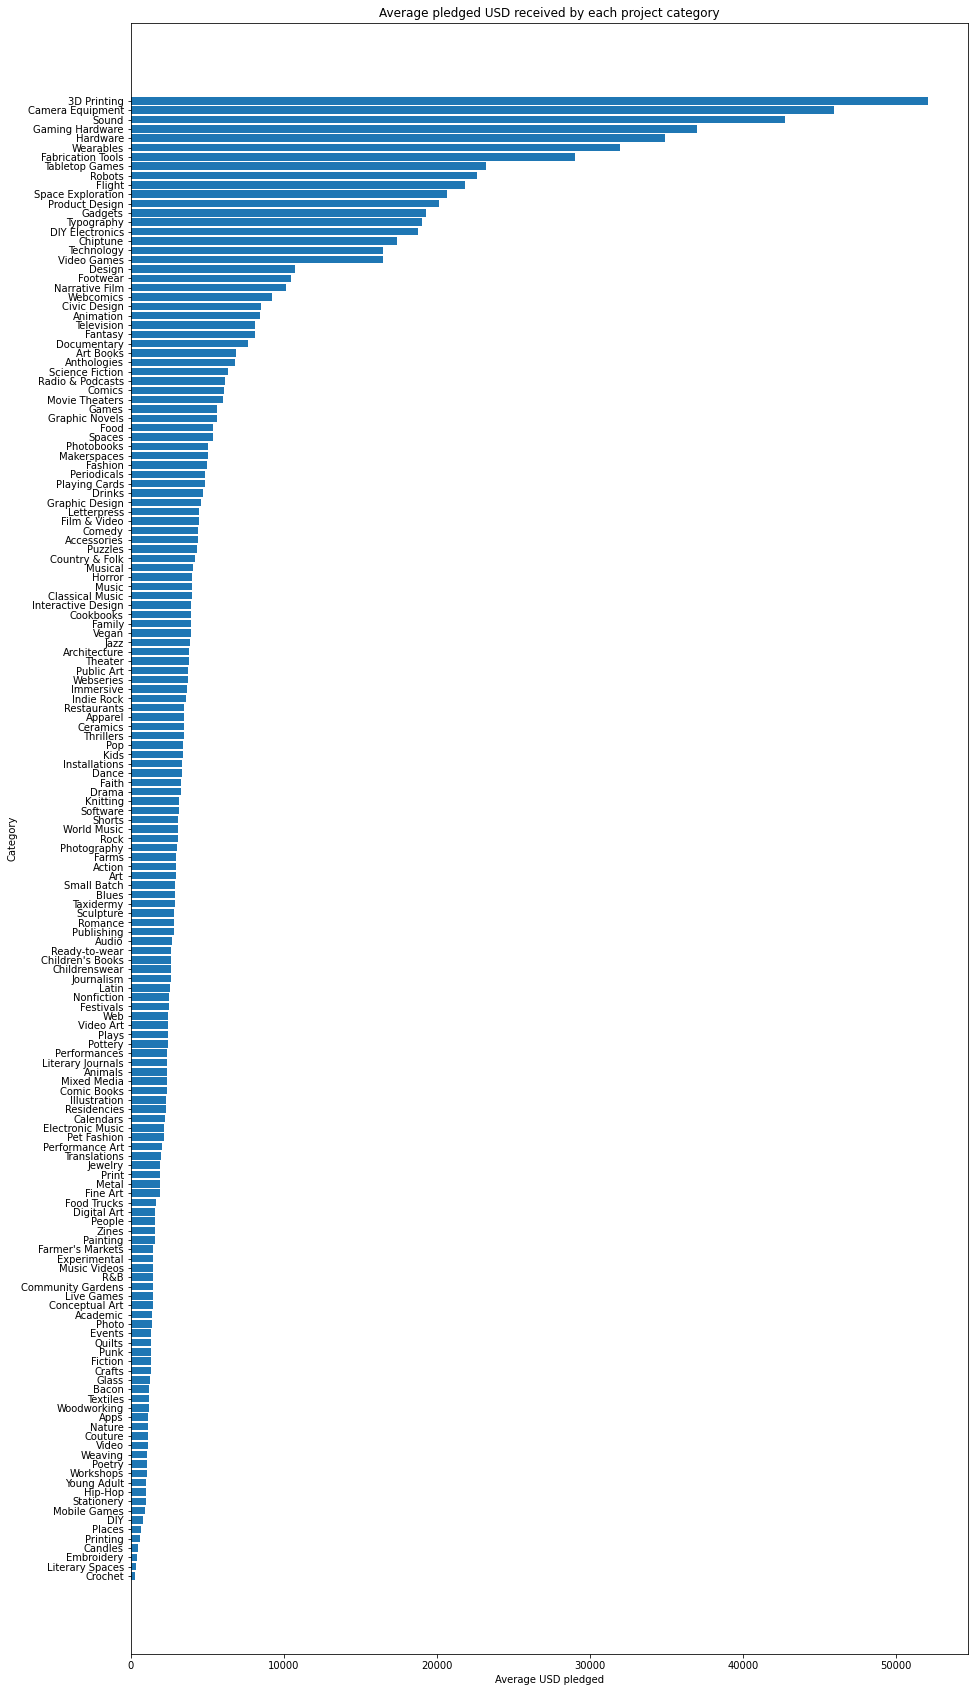

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(15,30))
plt.barh(y=results.index, width=results.values)  
plt.xlabel("Average USD pledged")
plt.ylabel("Category")
plt.title("Average pledged USD received by each project category")


## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer the following questions:

In [ ]:
# Download kaggle dataset
!kaggle datasets download -d csanhueza/the-marvel-universe-social-network -p ./datasets/the-marvel-universe-social-network/
!chdir ./datasets/the-marvel-universe-social-network
!unzip ./datasets/the-marvel-universe-social-network/*.zip -d ./datasets/the-marvel-universe-social-network/

**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [19]:
# load data
marvel_df = pd.read_csv('./datasets/the-marvel-universe-social-network/hero-network.csv')
print(marvel_df.shape)

# remove duplicates
marvel_df_wout_dup = marvel_df.drop_duplicates()
print(marvel_df_wout_dup.shape)

# check for null values
print(marvel_df_wout_dup.isna().sum())

(574467, 2)
(224181, 2)
hero1    0
hero2    0
dtype: int64


In [20]:
# group by heros - because not all the links are symmetric, I will calculate the groups for hero1 and hero2
groups_hero1 = marvel_df_wout_dup.groupby('hero1')
groups_hero2 = marvel_df_wout_dup.groupby('hero2')

# get all the heroes in the dataset
all_groups_keys = set(groups_hero1.groups.keys()).union(groups_hero2.groups.keys())

# this dict will contain the name of the heroes (key) and their number of friends (value).
heroes_friends = {}

# for each hero, join between his list of friends while he was hero1 and while he was hero2.
# the final list will contain all its unique friends (the intersection between the lists counted only once)
for name in all_groups_keys:
  try:
    hero2_friends = set(groups_hero1.get_group(name)['hero2'].values)
  except:
    hero2_friends = set()
  
  try:
    hero1_friends = set(groups_hero2.get_group(name)['hero1'].values)
  except:
    hero1_friends = set()
  
  heroes_friends[name] = len(hero2_friends.union(hero1_friends))

In [21]:
print("The top-10 most friendly characters:")
sort_by_friendly = sorted(heroes_friends.items(), key=lambda hero: hero[1], reverse=True) # sort by number of friends
sort_by_friendly[:10]

The top-10 most friendly characters:


[('CAPTAIN AMERICA', 1907),
 ('SPIDER-MAN/PETER PAR', 1737),
 ('IRON MAN/TONY STARK ', 1522),
 ('THING/BENJAMIN J. GR', 1416),
 ('MR. FANTASTIC/REED R', 1379),
 ('WOLVERINE/LOGAN ', 1371),
 ('HUMAN TORCH/JOHNNY S', 1361),
 ('SCARLET WITCH/WANDA ', 1325),
 ('THOR/DR. DONALD BLAK', 1289),
 ('BEAST/HENRY &HANK& P', 1267)]

**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [ ]:
!pip install networkx
import networkx as nx
%matplotlib inline 

In [23]:
# take the 150 most friendly characters - remove rows with different characters
most_friendly_names = [name for name, count in sort_by_friendly[:150]]
most_friendly_df = marvel_df_wout_dup[ (marvel_df_wout_dup['hero1'].isin(most_friendly_names)) & (marvel_df_wout_dup['hero2'].isin(most_friendly_names))]

# group the heroes in order to find their friends
groups_hero1 = most_friendly_df.groupby('hero1')
groups_hero2 = most_friendly_df.groupby('hero2')

# find each hero list of friends
all_groups_keys = set(groups_hero1.groups.keys()).union(groups_hero2.groups.keys())
heroes_friends = {}

for name in all_groups_keys:
  try:
    hero2_friends = set(groups_hero1.get_group(name)['hero2'].values)
  except:
    hero2_friends = set()
  
  try:
    hero1_friends = set(groups_hero2.get_group(name)['hero1'].values)
  except:
    hero1_friends = set()
  
  heroes_friends[name] = hero2_friends.union(hero1_friends)

In [24]:
# create links between friends
links = []
for hero, friends in heroes_friends.items():
  for friend in friends:
    if (friend, hero) not in links: # don't append links which already exist
      links.append((hero, friend))

In [25]:
# the size of the nodes - according to the nubmer of friends
nodes_size = [count for name, count in sort_by_friendly[:150]]

In [26]:
# the color of the nodes
nodes = pd.read_csv('./datasets/the-marvel-universe-social-network/nodes.csv')
print(nodes['type'].unique())

# create color_map - there are only two types: comic and hero.
# in our case because we use only the heroes .csv, we will have only heroes (red) and Unknown type characters (black). 
color_map = []
colors = {'hero': 'red', 'comic':'blue', 'NA': 'black'}

for node in most_friendly_names:
  try:
    node_type = nodes[nodes['node'] == node].iloc[0]['type']
    color = colors[node_type]
    color_map.append(color)
  except:
      color_map.append(colors['NA'])

['comic' 'hero']


In [27]:
# Create undirected graph
g = nx.Graph()
g.add_nodes_from(most_friendly_names)
g.add_edges_from(set(links))
nx.info(g)

'Graph with 150 nodes and 8400 edges'

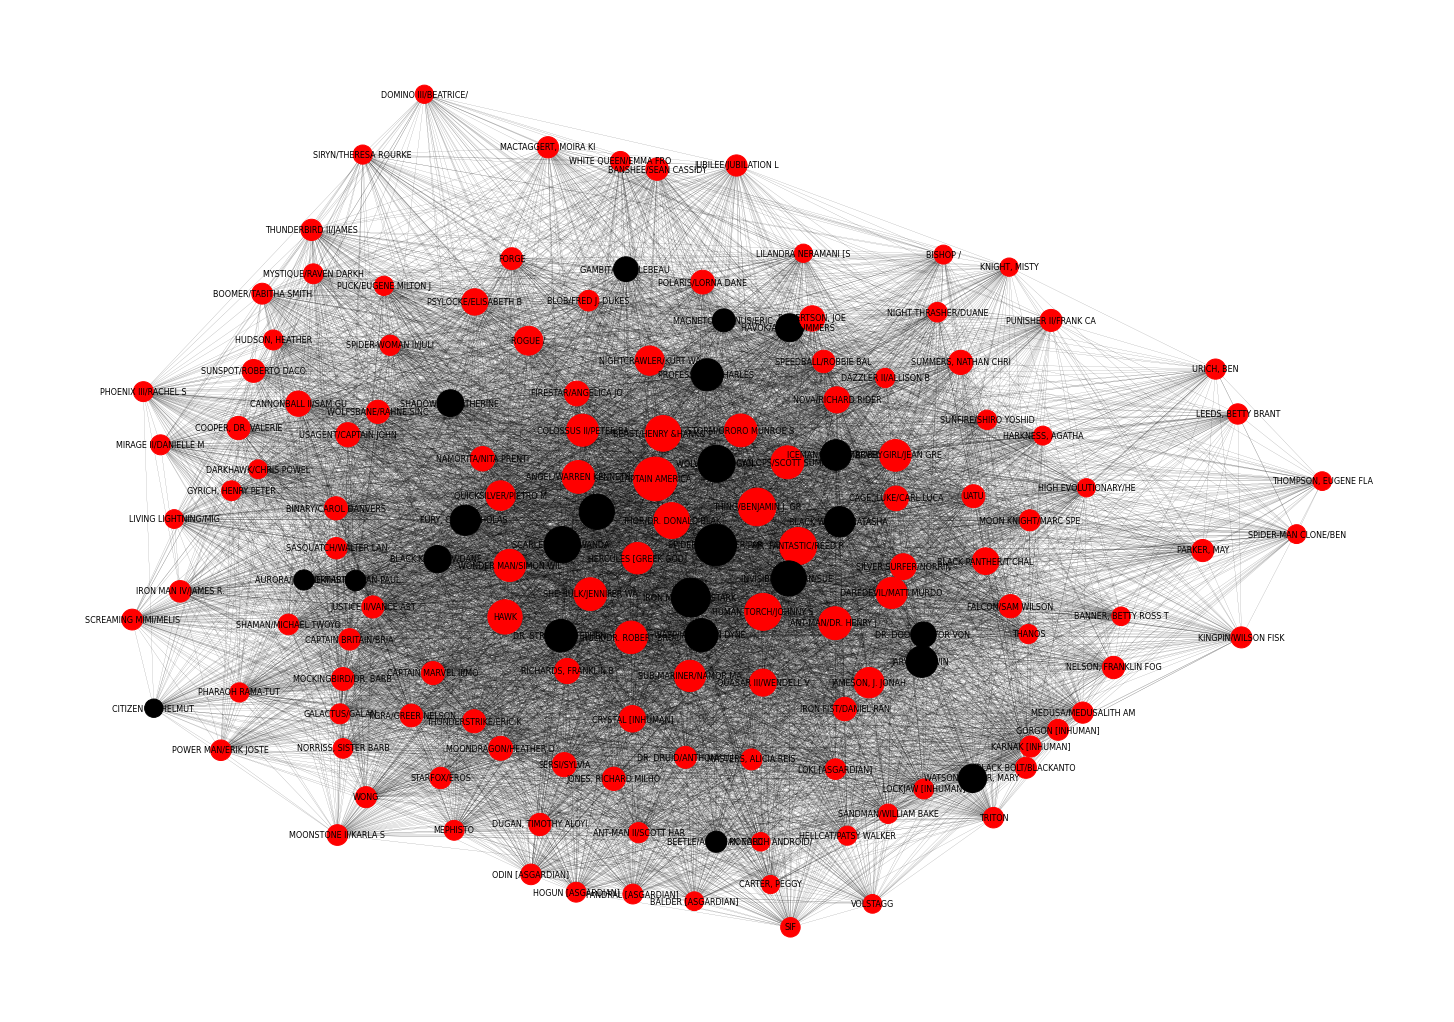

In [28]:
# visualize graph
import matplotlib.pyplot as plt
plt.figure(1,figsize=(20,14))
nx.draw_kamada_kawai(g, with_labels=True, node_size = nodes_size, node_color = color_map, width=.1, font_size=8)

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)

In [44]:
!pip install ipycytoscape
import ipycytoscape # library for visualize graphs using Cytoscape.js in a Jupyter Notebook. 

In [45]:
# Custom nodes in order to configure their size and color.
class CustomNode(ipycytoscape.Node):
    def __init__(self, name, color='', size=300):
        super().__init__()
        self.data['id'] = name
        self.data['color'] = color
        self.data['size'] = size

In [46]:
# Create netwrokx graph with custom nodes
G = nx.Graph()
for i in range(len(most_friendly_names)):
  G.add_node(CustomNode(most_friendly_names[i], color_map[i], nodes_size[i]))
G.add_edges_from(set(links))

In [47]:
# convert networkx graph into cytoscape
cy_obj = ipycytoscape.CytoscapeWidget()
cy_obj.graph.add_graph_from_networkx(G)

In [48]:
# configure the style of the nodes - tags, size, color, edges
cy_obj.set_style(
    [
     {
        'selector': 'node',
        'style': {
          'font-family': 'helvetica',
          'font-size': '100px',
          'label': 'data(id)',
          'width': 'data(size)',
          'height': 'data(size)'
        }
     },

     {
        'selector': 'edge',
        'css': {
          'line-color': 'yellow'
        }    
     },

     {
        'selector': 'node[color = "red"]',
        'css': {
          'background-color': 'red'
       }
     },

     {
        'selector': 'node[color = "blue"]',
        'css': {
          'background-color': 'blue'
       }
     },

     {
        'selector': 'node[color = "black"]',
        'css': {
          'background-color': 'black'
       }
     },

    ]
)

In [49]:
# enable widget
from google.colab import output
output.enable_custom_widget_manager()

In [50]:
# show plot
cy_obj

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'font-famil…

In [51]:
# disable widget
from google.colab import output
output.disable_custom_widget_manager()